In [1]:
import mfpy
import matplotlib.pyplot as plt
from cycler import cycler
from matplotlib.lines import Line2D

### Fx pure

[ 1.49665728e+00  9.72680092e-01 -1.22450108e-01  5.00963848e+00
  1.92688808e-01  3.29368636e-01  3.35462569e-02 -1.79241862e-02
  2.10494800e+01  1.66048032e+01 -6.30017447e-01  4.63581644e-04
  1.30250084e-03  3.40890641e-05 -6.83240322e-04]


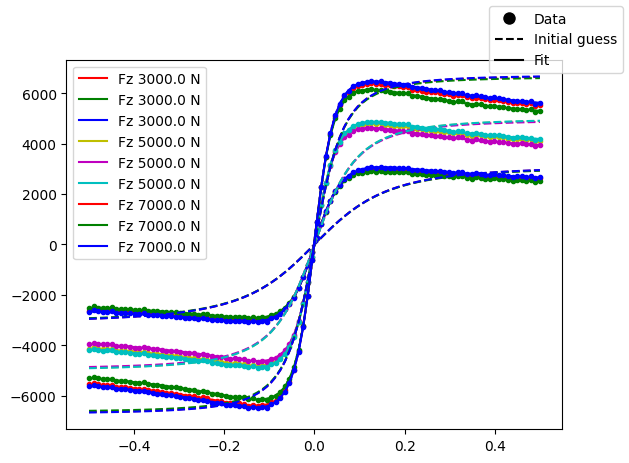

In [2]:
Fx_pure_folder = r'samples\fit\Fx_pure'#Folder that contains the .csv files in the right name format. For more details check the MFPy_/fit.py or read the readme.md



'''Calling the fit function for the Fx_Pure. The user can chose if he wants to inputs his own initial guess for the fitting process, the nominal force and 
the desired output. For initial_guess = None, the function will use a pre-built initial guess. For Fz_nom = None, the function will use the median of the
Fz forces in the .csv file.
For the output types, with full_output is None, the output will be only the fittted coefficients (p_fit) and the Fx_fitted. For a complete output, the user can
can use the full_output = 2.
'''

p_fit_FX0,initial_guess,FZ_nom,FZ_data_output,FX_data_output,kappa_data,gamma_data,FX_initial_output,FX_fit_output = mfpy.fit.FX_pure(Fx_pure_folder,initial_guess = None,FZ_nom=None,full_output=2)


#Plot settings
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)

fig, ax = plt.subplots()
for i in range(len(FZ_data_output)):
    color = colors[i % len(colors)] 
    ax.plot(kappa_data[i],FX_initial_output[i],'--',color=color)
    ax.plot(kappa_data[i],FX_data_output[i],':',marker=".",color=color)
    ax.plot(kappa_data[i],FX_fit_output[i],'-',color=color,label='Fz {} N'.format(FZ_data_output[i]))
ax.legend()
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right')
print(p_fit_FX0)

### Fy pure cornering

[ 1.49564439e+00  8.87605824e-01 -6.33277786e-02  2.92556928e-02
 -1.23928700e+00 -7.40334955e-01  7.74216742e-02 -6.71033618e+00
 -1.19424457e+01  1.61295729e+00  4.01171283e-01 -1.38854720e-03
  3.90668028e-03 -1.38826833e-04  3.67730022e-03  5.09068600e-02
  7.14104172e-02 -6.26252919e-01]


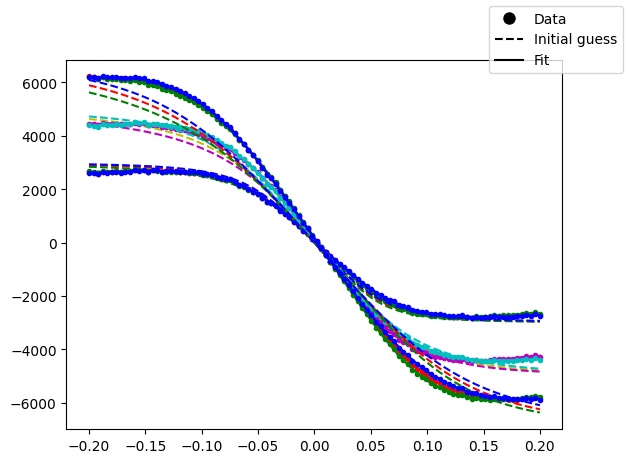

In [3]:
Fy_pure_folder = r'samples\fit\Fy_pure'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md

p_fit_FY0,initial_guess,Fz_nom,Fz_data_output,Fy_data_output,alpha_data,gamma_data,Fy_initial_output,Fy_fit_output = mfpy.fit.FY_pure(Fy_pure_folder,initial_guess=None,FZ_nom=None,full_output=2)

colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Fy_data_output)):
    color = colors[i % len(colors)]
    ax.plot(alpha_data[i],Fy_initial_output[i],'--',color=color)
    ax.plot(alpha_data[i],Fy_data_output[i],':',marker=".",color=color)
    ax.plot(alpha_data[i],Fy_fit_output[i],'-',color=color)
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right')   
print(p_fit_FY0)

### Mz pure cornering

[ 1.01496062e+01  7.88736231e-01 -9.99962203e-01 -4.17933616e+00
  4.50001614e+00  1.61471859e+01 -5.37261608e-01  9.81985581e-01
  1.19866396e-01 -4.68542878e-03  9.05750119e-01 -1.46404732e-01
  1.04017349e-03 -1.58411321e-03 -1.46061789e-01  1.82123121e-02
 -3.18981166e+00  3.24714218e+00 -1.74726805e+00  3.15670234e-01
  3.00953402e-01  9.19274082e-04  1.90930457e-03  1.19516673e-01
 -2.62366098e-01]


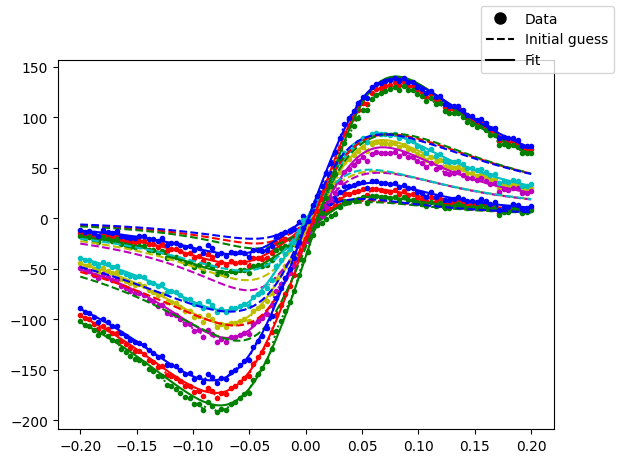

In [4]:
#Fitting Mz pure

Mz_pure_folder = r'samples\fit\Mz_pure'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md
R0 = 0.31 #Unloaded radius in m (necessary parameter)
VX = 20
p_fit_MZ0,initial_guess,Fz_nom,Fz_data,Mz_data,alpha_data,gamma_data,Mz_initial,Mz_fit = mfpy.fit.MZ_pure(Mz_pure_folder,R0,VX,p_fit_FY0,FZ_nom=None,full_output=2) 
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Mz_data)):
    color = colors[i % len(colors)]
    ax.plot(alpha_data[i],Mz_initial[i],'--',color=color)
    ax.plot(alpha_data[i],Mz_data[i],':',marker=".",color=color)
    ax.plot(alpha_data[i],Mz_fit[i],'-',color=color)
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right') 
print(p_fit_MZ0)

#### Fx combined

[ 1.06374554e+01  1.04339202e+01  1.01164124e+00 -4.28464356e-01
 -5.59835352e-01 -2.98805671e-03]


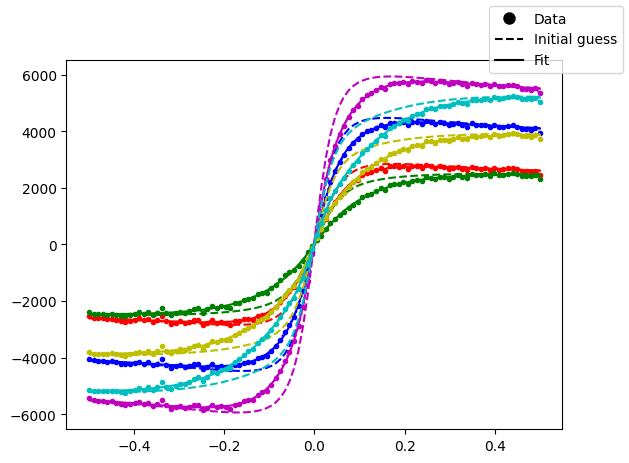

In [5]:
Fx_combined_folder = r'samples\fit\Fx_combined'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md
p_fit_FX,initial_guess,FZ_nom,FZ_data_output,FX_data_output,kappa_data,alpha_data,FX_initial_output,FX_fit_output = mfpy.fit.FX_combined(Fx_combined_folder,p_fit_FX0,FZ_nom=None,full_output=2) #The Mz_folder needs the p_fit_Fy_pure

#Plot settings
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(FZ_data_output)):
    color = colors[i % len(colors)] 
    ax.plot(kappa_data[i],FX_initial_output[i],'--',color=color)
    ax.plot(kappa_data[i],FX_data_output[i],':',marker=".",color=color)
    ax.plot(kappa_data[i],FX_fit_output[i],'-',color=color)
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right')
print(p_fit_FX)

#### Fy combined

[ 5.97144109e+00  6.54122912e+00  3.62842005e-03  9.36560419e-01
 -1.47407758e+00 -1.75532455e-01  7.07630354e-02  3.95115525e-03
  4.31433871e-02  9.93016693e-03 -7.86667598e-04  9.37318049e+01
  2.79771195e+00  1.03100972e+01]


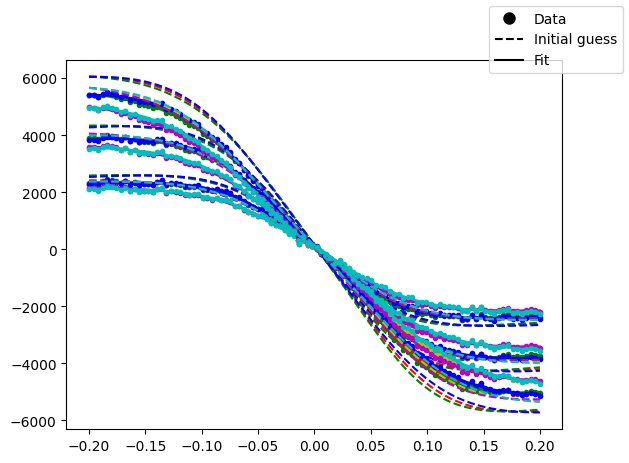

In [6]:
Fy_combined_folder = r'samples\fit\Fy_combined'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md
p_fit_FY,initial_guess,Fz_nom,Fz_data_output,Fy_data_output,kappa_data,alpha_data,gamma_data,Fy_initial_output,Fy_fit_output = mfpy.fit.FY_combined(Fy_combined_folder,p_fit_FY0,FZ_nom=None,full_output=2) #The Mz_folder needs the p_fit_Fy_pure
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Fy_data_output)):
    color = colors[i % len(colors)]
    ax.plot(alpha_data[i],Fy_initial_output[i],'--',color=color)
    ax.plot(alpha_data[i],Fy_data_output[i],':',marker=".",color=color)
    ax.plot(alpha_data[i],Fy_fit_output[i],'-',color=color)
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right')   
print(p_fit_FY)

#### Mz combined

[0.01048765 0.06310841 0.00824345 0.00315202]


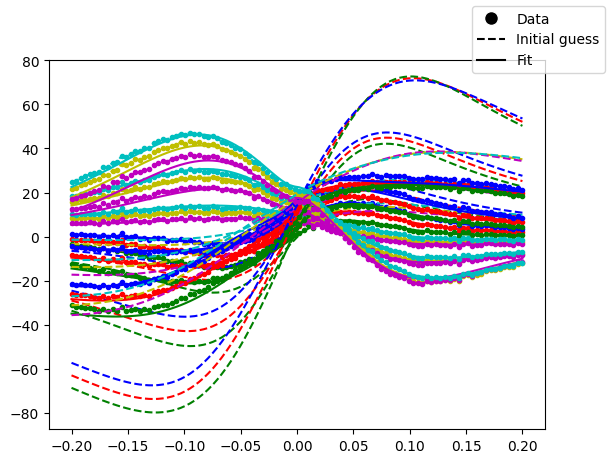

In [7]:
Mz_combined_folder = r'samples\fit\Mz_combined'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md
p_fit_Mz,initial_guess,Fz_nom,Fz_data_output,Mz_data_output,alpha_data,gamma_data,Mz_initial_output,Mz_fit_output = mfpy.fit.MZ_combined(Mz_combined_folder,R0,VX,p_fit_FY0,p_fit_FX0,p_fit_MZ0,p_fit_FY,p_fit_FX,FZ_nom=None,full_output=2) #The Mz_folder needs the p_fit_Fy_pure
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Mz_data_output)):
    color = colors[i % len(colors)]
    ax.plot(alpha_data[i],Mz_initial_output[i],'--',color=color)
    ax.plot(alpha_data[i],Mz_data_output[i],':',marker=".",color=color)
    ax.plot(alpha_data[i],Mz_fit_output[i],'-',color=color)
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right') 
print(p_fit_Mz)